In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Scores
from sklearn.metrics import (r2_score,
                             mean_absolute_error,
                             mean_squared_error,
                             mean_absolute_percentage_error
                            )
# Cross Validation
from sklearn.model_selection import RandomizedSearchCV
# ML Regression models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import data

In [5]:
df = pd.read_csv('data/student.csv')

Check

In [6]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,A
1,female,group C,some college,standard,completed,69,90,88,82.333333,A


Create X y

In [4]:
X = df.drop(columns=['average_score','grade'],axis=1)
y = df[['average_score']]

In [5]:
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [7]:
overview = X.describe()

In [9]:
overview.loc[["min", "max"]].to_json("schema_minmax_range.json")

In [6]:
y.head(2)

,average_score
0,72.666667
1,82.333333


Column transformer

In [15]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [16]:
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(1000, 20)

Train-Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)#,stratify=y, shuffle = False
X_train.shape, X_test.shape

((800, 20), (200, 20))

Evaluate Function

In [28]:
def evaluate_model(true, predicted):
    #Mean absolute percentage error
    mape = mean_absolute_percentage_error(true, predicted)
    #Mean absolute error
    mae = mean_absolute_error(true, predicted)
    #Mean squared error
    mse = mean_squared_error(true, predicted)
    #Root mean squared error
    rmse = np.sqrt(mse)
    #R Squared
    r2 = r2_score(true, predicted)
    #Adjusted R Squared
    #a_r2 = 1 - (1-r2)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)
    return mape, mae, mse, rmse, r2

Model Training

In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list_train =[]
r2_list_test =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mape , model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mape, model_test_mae ,model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- MAPE: {:.4f}".format(model_train_mape))
    print("- MAE: {:.4f}".format(model_train_mae))
    print("- MSE: {:.4f}".format(model_train_mse))
    print("- RMSE: {:.4f}".format(model_train_rmse))
    print("- R2: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- MAPE: {:.4f}".format(model_test_mape))
    print("- MAE: {:.4f}".format(model_test_mae))
    print("- MSE: {:.4f}".format(model_test_mse))
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- R2: {:.4f}".format(model_test_r2))
    r2_list_train.append(model_train_r2)
    r2_list_test.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- MAPE: 0.0000
- MAE: 0.0000
- MSE: 0.0000
- RMSE: 0.0000
- R2: 1.0000
----------------------------------
Model performance for Test set
- MAPE: 0.0000
- MAE: 0.0000
- MSE: 0.0000
- RMSE: 0.0000
- R2: 1.0000


K-Neighbors Regressor
Model performance for Training set
- MAPE: 0.0280
- MAE: 1.7680
- MSE: 5.0954
- RMSE: 2.2573
- R2: 0.9745
----------------------------------
Model performance for Test set
- MAPE: 0.0478
- MAE: 2.2800
- MSE: 9.4261
- RMSE: 3.0702
- R2: 0.9560


Decision Tree
Model performance for Training set
- MAPE: 0.0000
- MAE: 0.0000
- MSE: 0.0000
- RMSE: 0.0000
- R2: 1.0000
----------------------------------
Model performance for Test set
- MAPE: 0.0234
- MAE: 1.1100
- MSE: 2.5767
- RMSE: 1.6052
- R2: 0.9880




C:\Users\ataha\AppData\Local\Temp\ipykernel_8232\3777304688.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) # Train model


Random Forest Regressor
Model performance for Training set
- MAPE: 0.0031
- MAE: 0.1786
- MSE: 0.0785
- RMSE: 0.2803
- R2: 0.9996
----------------------------------
Model performance for Test set
- MAPE: 0.0153
- MAE: 0.5466
- MSE: 1.3003
- RMSE: 1.1403
- R2: 0.9939


XGBRegressor
Model performance for Training set
- MAPE: 0.0004
- MAE: 0.0287
- MSE: 0.0016
- RMSE: 0.0397
- R2: 1.0000
----------------------------------
Model performance for Test set
- MAPE: 0.0143
- MAE: 0.5740
- MSE: 0.9317
- RMSE: 0.9653
- R2: 0.9957




C:\Users\ataha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Regressor
Model performance for Training set
- MAPE: 0.0215
- MAE: 1.3711
- MSE: 3.0824
- RMSE: 1.7557
- R2: 0.9845
----------------------------------
Model performance for Test set
- MAPE: 0.0329
- MAE: 1.5594
- MSE: 4.7838
- RMSE: 2.1872
- R2: 0.9777




Best Result

In [38]:
pd.DataFrame(list(zip(model_list, r2_list_test, r2_list_train )), columns=['Model Name', 'R2_Test', 'R2_Train']).sort_values(by=["R2_Test"],ascending=False)

,Model Name,R2_Test,R2_Train
0,Linear Regression,1.000000,1.000000
4,XGBRegressor,0.995653,0.999992
3,Random Forest Regressor,0.993934,0.999606
2,Decision Tree,0.987980,1.000000
5,AdaBoost Regressor,0.977684,0.984546
1,K-Neighbors Regressor,0.956028,0.974453


Regressor

In [39]:
reg = RandomForestRegressor()#(fit_intercept=True)
reg_model = reg.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

C:\Users\ataha\AppData\Local\Temp\ipykernel_8232\896018947.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_model = reg.fit(X_train, y_train)


 Accuracy of the model is 99.36


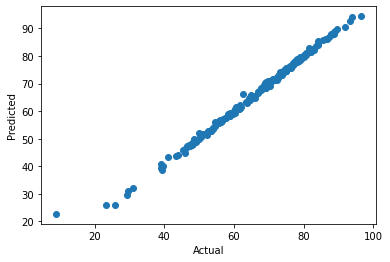

In [50]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

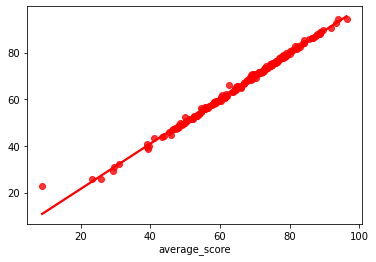

In [41]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');